<a href="https://colab.research.google.com/github/utsav-mishra/Utsav/blob/master/Mental_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [4]:
data = pd.read_csv('survey.csv')

In [5]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [ ]:
data.isna().sum()

In [7]:
data = data.drop('comments', axis=1)

In [8]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [9]:
data['self_employed'].mode()

0    No
dtype: object

In [10]:
data['self_employed'] = data['self_employed'].fillna('No')


In [11]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [12]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [13]:
data['work_interfere'] = data['work_interfere'].fillna('Sometimes')

In [ ]:
data

In [ ]:
data['Timestamp']

In [16]:
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

data = data.drop('Timestamp', axis=1)

In [ ]:

data

In [18]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Country': 48,
 'Gender': 49,
 'anonymity': 3,
 'benefits': 3,
 'care_options': 3,
 'coworkers': 3,
 'family_history': 2,
 'leave': 5,
 'mental_health_consequence': 3,
 'mental_health_interview': 3,
 'mental_vs_physical': 3,
 'no_employees': 6,
 'obs_consequence': 2,
 'phys_health_consequence': 3,
 'phys_health_interview': 3,
 'remote_work': 2,
 'seek_help': 3,
 'self_employed': 2,
 'state': 46,
 'supervisor': 3,
 'tech_company': 2,
 'treatment': 2,
 'wellness_program': 3,
 'work_interfere': 4}

In [ ]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

In [20]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [21]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [22]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]
nominal_features = [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [23]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

# New section

In [24]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [25]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

In [26]:
data = binary_encode(data, columns=['treatment'], positive_values=['Yes'])

In [27]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


In [28]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [29]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [31]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 49.6% / 50.4%


In [32]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
13/13 [==============================] - 2s 56ms/step - loss: 0.7881 - accuracy: 0.5601 - auc: 0.5937 - val_loss: 0.6527 - val_accuracy: 0.6287 - val_auc: 0.6942
Epoch 2/50
13/13 [==============================] - 0s 25ms/step - loss: 0.4817 - accuracy: 0.7791 - auc: 0.8629 - val_loss: 0.7318 - val_accuracy: 0.6089 - val_auc: 0.6779
Epoch 3/50
13/13 [==============================] - 0s 27ms/step - loss: 0.3949 - accuracy: 0.8159 - auc: 0.9241 - val_loss: 0.7971 - val_accuracy: 0.6287 - val_auc: 0.6872
Epoch 4/50
13/13 [==============================] - 0s 28ms/step - loss: 0.3016 - accuracy: 0.8804 - auc: 0.9495 - val_loss: 0.9062 - val_accuracy: 0.6188 - val_auc: 0.6786
Epoch 5/50
13/13 [==============================] - 0s 25ms/step - loss: 0.2530 - accuracy: 0.8963 - auc: 0.9715 - val_loss: 0.9597 - val_accuracy: 0.6287 - val_auc: 0.6760
Epoch 6/50
13/13 [==============================] - 0s 26ms/step - loss: 0.1806 - accuracy: 0.9411 - auc: 0.9876 - val_loss: 1.0882 - v

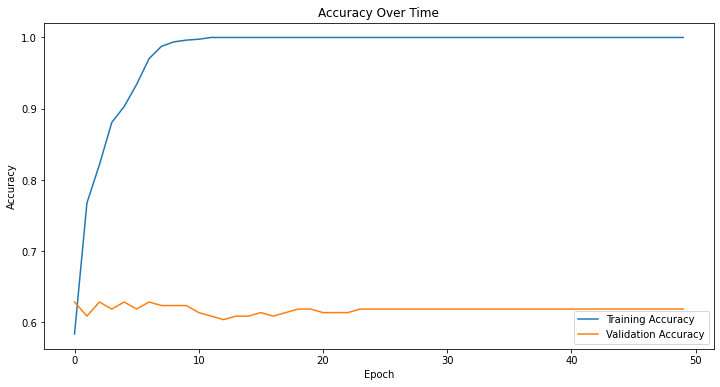

In [33]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [34]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 5ms/step - loss: 2.0566 - accuracy: 0.6786 - auc: 0.7185


[2.0565834045410156, 0.6785714030265808, 0.7185036540031433]